In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
from google.colab import files
files.upload()
abalone_train = pd.read_csv(
    "test.csv",names=["x", "y"])

abalone_train.head()

Saving test.csv to test (1).csv


,x,y
0,x,y
1,77,79.77515201
2,21,23.17727887
3,22,25.60926156
4,20,17.85738813


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('x')
abalone_features = np.array(abalone_features)
abalone_features

array([['y'],
       ['79.77515201'],
       ['23.17727887'],
       ['25.60926156'],
       ['17.85738813'],
       ['41.84986439'],
       ['9.805234876'],
       ['58.87465933'],
       ['97.61793701'],
       ['18.39512747'],
       ['8.746747654'],
       ['2.811415826'],
       ['17.09537241'],
       ['95.14907176'],
       ['61.38800663'],
       ['40.24701716'],
       ['14.82248589'],
       ['66.95806869'],
       ['16.63507984'],
       ['90.65513736'],
       ['77.22982636'],
       ['92.11906278'],
       ['46.91387709'],
       ['89.82634442'],
       ['21.71380347'],
       ['97.41206981'],
       ['57.01631363'],
       ['78.31056542'],
       ['19.1315097'],
       ['93.03483388'],
       ['26.59112396'],
       ['97.55155344'],
       ['31.43524822'],
       ['35.12724777'],
       ['78.61042432'],
       ['33.07112825'],
       ['51.69967172'],
       ['53.62235225'],
       ['69.46306072'],
       ['27.42497237'],
       ['36.34644189'],
       ['95.06140858'],
   

In [17]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())
abalone_model

In [18]:
normalize = preprocessing.Normalization()
normalize

In [16]:
norm_abalone_model = tf.keras.Sequential([
  normalize
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())
norm_abalone_model

Для 3


In [21]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from google.colab import files
files.upload()
abalone_train = pd.read_csv("glass.csv",names=["RL","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])

abalone_train.head()

Saving glass.csv to glass (1).csv


,RL,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1


In [24]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('K')
abalone_features = np.array(abalone_features)
abalone_features
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

In [28]:
normalize = preprocessing.Normalization()
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())
titanic = pd.read_csv("glass.csv")
titanic.head()



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('K')

In [37]:

input = tf.keras.Input(shape=(), dtype=tf.float32)

result = 2*input + 1

result
calc = tf.keras.Model(inputs=input, outputs=result)
print(calc(1).numpy())
print(calc(2).numpy())

inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

preprocessed_inputs = [all_numeric_inputs]


for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

3.0
5.0


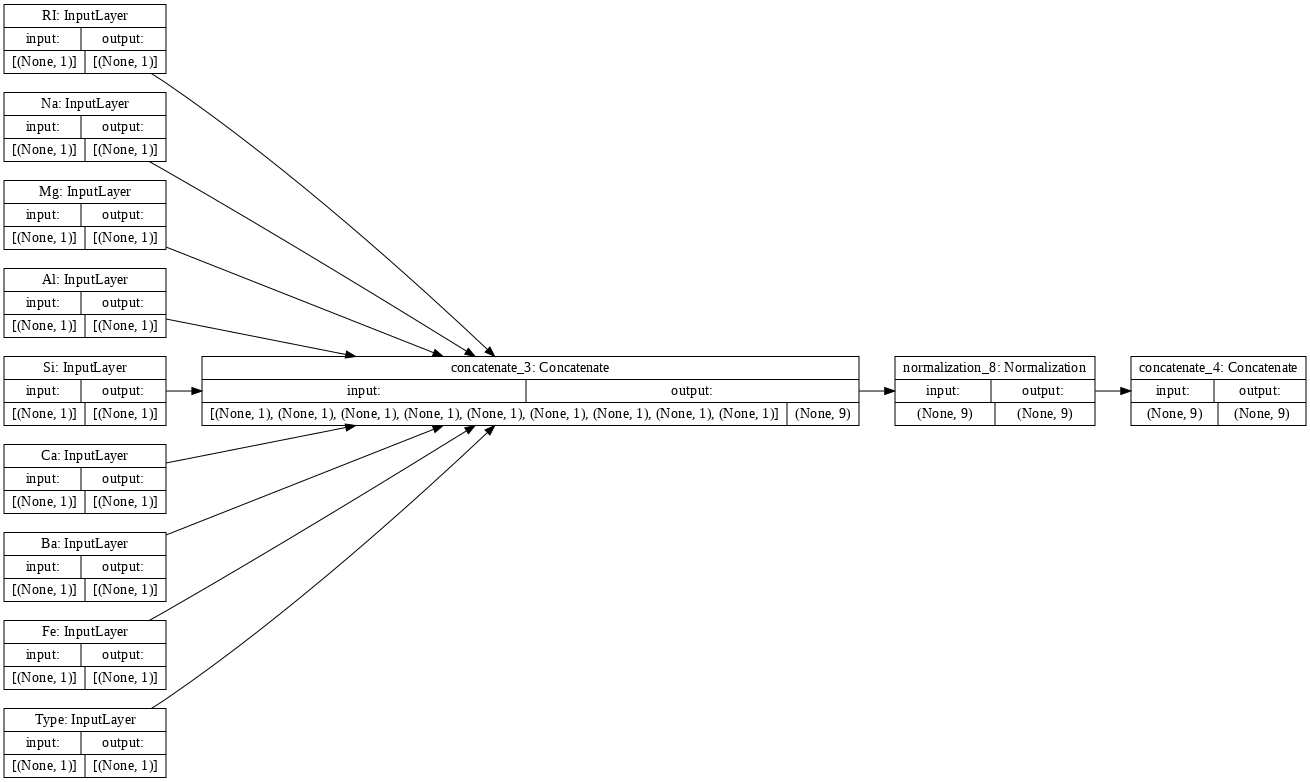

In [38]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)